# Budget accounting with diffprivlib

Diffprivlib includes a budget accountant to allow you to keep track of privacy budget being spent. The budget accounting is handled by the `BudgetAccountant` class.

Basic functionality of the `BudgetAccountant` includes initialisation with an appropriate `epsilon` and `delta` (if desired), determining the total current spend with `total()` and evaluating the remaining budget to be spent with `remaining()`.

In [1]:
import numpy as np
from diffprivlib import BudgetAccountant
from diffprivlib.tools import mean, var

X = np.random.random(100)

In [2]:
acc = BudgetAccountant(2, 0)
dp_mean = mean(X, range=1, accountant=acc)

print("Total spent: {}".format(acc.total()))
print("Remaining budget (for 1 query): {}".format(acc.remaining()))

Total spent: (1.0, 0)
Remaining budget (for 1 query): (1.0, 0.0)


If a query were to exceed the privacy budget specified in the accountant, an error is raised and execution does not continue.

In [3]:
acc = BudgetAccountant(1.5, 0)

dp_mean = mean(X, epsilon=1, range=1, accountant=acc)

try:
    dp_std = var(X, epsilon=1, range=1, accountant=acc)
except Exception as e:
    print("Error raised {}: {}".format(type(e), e))

Error raised <class 'diffprivlib.utils.BudgetError'>: Privacy spend of (1,0) not permissible; will exceed remaining privacy budget. Use BudgetAccountant.remaining to check remaining budget.


## Using `BudgetAccountant` to track privacy budget

There are three ways to use the `BudgetAccountant` class to track budget spend across many operations:
1. **Parameterisation:** Passed as a parameter (`accountant=acc`)
2. **Default:** Set as a default (`set_default()`)
3. **Context manager:** Using `with` over a block of code

In [4]:
acc_p = BudgetAccountant()
mean(X, epsilon=1.618, range=1, accountant=acc_p)

print("Total spend: {}".format(acc_p.total()))

Total spend: (1.618, 0)


In [5]:
acc_d = BudgetAccountant()
acc_d.set_default()
mean(X, epsilon=2.718, range=1)

print("Total spend: {}".format(acc_d.total()))

Total spend: (2.718, 0)


In [6]:
with BudgetAccountant() as acc_w:
    mean(X, epsilon=1.5705, range=1)
    var(X, epsilon=1.5705, range=1)

print("Total spend: {}".format(acc_w.total()))

Total spend: (3.141, 0)


# Setting the `slack`

Composition of privacy budgets typically add up linearly, that is unless you allow a slack in your `delta`. This is goverened by the `slack` parameter in the initialisation.

The benefit of a non-zero slack is especially evident when many queries are being asked.

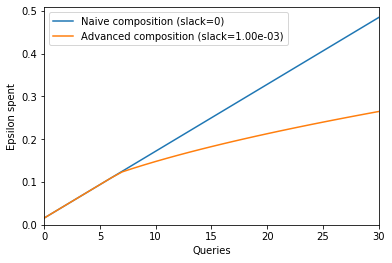

In [7]:
acc = BudgetAccountant(slack=1e-3)
epsilon, queries = 2**-6, 31

budget_summed = [epsilon * (i + 1) for i in range(queries)]
budget_composed = [acc.spend(epsilon, 0).total()[0] for i in range(queries)]

import matplotlib.pyplot as plt
plt.plot(np.arange(queries), budget_summed, label="Naive composition (slack=0)")
plt.plot(np.arange(queries), budget_composed, label="Advanced composition (slack=%.2e)" % acc.slack)
plt.xlabel("Queries")
plt.ylabel("Epsilon spent")
plt.xlim(0, queries - 1)
plt.ylim(0, None)
plt.legend()